In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from config import gkey

In [39]:
ed_heatmap = pd.read_csv('all_interesting_info.csv')
ed_heatmap.head(3)

,id,latest.admissions.admission_rate.overall,latest.aid.median_debt.completers.overall,latest.aid.median_debt.female_students,latest.aid.median_debt.male_students,latest.aid.median_debt.noncompleters,latest.completion.completion_rate_4yr_150nt,latest.completion.completion_rate_four_year_100_pooled,latest.cost.attendance.academic_year,latest.cost.tuition.in_state,...,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.5_yr_repayment.female_students_rate,latest.repayment.5_yr_repayment.male_students_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.female_students_rate,latest.repayment.7_yr_repayment.male_students_rate,latest.student.demographics.female_share,location.lat,location.lon,school.name
0,482422,0.8772,35766.5,15817.0,21957.0,13131.0,0.2736,0.2111,34909.0,19948.0,...,0.665704,0.397561,0.429791,0.684211,0.464434,0.489295,0.605905,33.565758,-112.104601,DeVry University-Arizona
1,482468,0.8649,35766.5,15817.0,21957.0,13131.0,0.2368,0.1254,34280.0,19948.0,...,0.665704,0.397561,0.429791,0.684211,0.464434,0.489295,0.605905,33.775112,-84.297316,DeVry University-Georgia
2,482538,0.9444,35766.5,15817.0,21957.0,13131.0,0.3248,0.2470,28920.0,19948.0,...,0.665704,0.397561,0.429791,0.684211,0.464434,0.489295,0.605905,38.939506,-94.575014,DeVry University-Missouri


In [40]:
ed_heatmap1 = ed_heatmap.filter(['id','school.name', 'location.lat','location.lon',
                                 'latest.aid.median_debt.female_students','latest.aid.median_debt.male_students',
                                'latest.aid.median_debt.noncompleters','latest.aid.median_debt.completers.overall'], axis=1)

ed_heatmap1.head()

,id,school.name,location.lat,location.lon,latest.aid.median_debt.female_students,latest.aid.median_debt.male_students,latest.aid.median_debt.noncompleters,latest.aid.median_debt.completers.overall
0,482422,DeVry University-Arizona,33.565758,-112.104601,15817.0,21957.0,13131.0,35766.5
1,482468,DeVry University-Georgia,33.775112,-84.297316,15817.0,21957.0,13131.0,35766.5
2,482538,DeVry University-Missouri,38.939506,-94.575014,15817.0,21957.0,13131.0,35766.5
3,482565,DeVry University-North Carolina,35.137660,-80.931971,15817.0,21957.0,13131.0,35766.5
4,482608,DeVry University-Pennsylvania,40.138978,-75.179176,15817.0,21957.0,13131.0,35766.5


In [41]:
gmaps.configure(api_key=gkey)
school_location = ed_heatmap1[["location.lat", "location.lon"]]
female_debt = ed_heatmap1["latest.aid.median_debt.female_students"].tolist()

# heat_layer = gmaps.heatmap_layer(school_location, weights=female_debt, 
#                                  dissipating=False, max_intensity=50,
#                                  point_radius = 0.2)

heat_layer = gmaps.symbol_layer(
    school_location, fill_color='Red',
    stroke_color='Red', scale=3,
    info_box_content=[f"Debt_Female: {debt}" for debt in female_debt])
        
fig = gmaps.figure()
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
male_debt = ed_heatmap1["latest.aid.median_debt.male_students"].tolist()

# heat_layer1 = gmaps.heatmap_layer(school_location, weights=male_debt, 
#                                  dissipating=False, max_intensity=50,
#                                  point_radius = 0.2)

heat_layer1 = gmaps.symbol_layer(
    school_location, fill_color='Blue',
    stroke_color='Blue', scale=2,
    info_box_content=[f"Debt_Male: {debt}" for debt in male_debt])

fig = gmaps.figure()
fig.add_layer(heat_layer1)

fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
total_debt = ed_heatmap1["latest.aid.median_debt.completers.overall"].tolist()

# heat_layer1 = gmaps.heatmap_layer(school_location, weights=male_debt, 
#                                  dissipating=False, max_intensity=50,
#                                  point_radius = 0.2)

heat_layer2 = gmaps.symbol_layer(
    school_location, fill_color='Yellow',
    stroke_color='Yellow', scale=3,
    info_box_content=[f"Debt_Total: {debt}" for debt in total_debt])

fig = gmaps.figure()
fig.add_layer(heat_layer2)

fig

Figure(layout=FigureLayout(height='420px'))

In [53]:
total_debt = ed_heatmap1["latest.aid.median_debt.completers.overall"].tolist()

heat_layer2 = gmaps.heatmap_layer(school_location, weights=total_debt, 
                                 dissipating=False, max_intensity=50,
                                 point_radius = 0.2)

fig = gmaps.figure()
fig.add_layer(heat_layer2)

fig

Figure(layout=FigureLayout(height='420px'))

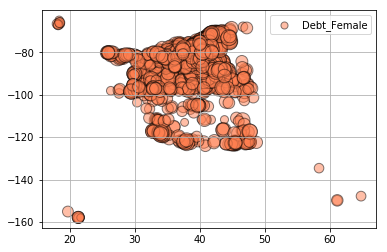

In [51]:
plt.scatter(x=ed_heatmap1["location.lat"], y=ed_heatmap1["location.lon"], color = "Coral", 
           s = ed_heatmap1["latest.aid.median_debt.female_students"]/100, label = "Debt_Female",
            alpha=0.5, linewidth=1, edgecolor="black")

# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Ride (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.text(45,35,"Note: Circle size correlates with driver count per city.")
plt.grid()
lgnd = plt.legend(loc="best")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

plt.show()                                                         

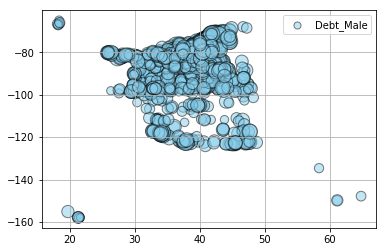

In [52]:
plt.scatter(x=ed_heatmap1["location.lat"], y=ed_heatmap1["location.lon"], color = "Skyblue", 
           s = ed_heatmap1["latest.aid.median_debt.male_students"]/100, label = "Debt_Male",
            alpha=0.5, linewidth=1, edgecolor="black")

# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Ride (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.text(45,35,"Note: Circle size correlates with driver count per city.")
plt.grid()
lgnd = plt.legend(loc="best")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

plt.show()     